<a href="https://colab.research.google.com/github/sohdacafe/Work-efficiency/blob/main/titanic_totalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
file_name = 'titanic_data_train.csv'
df = pd.read_csv(file_name)

In [96]:
df = df.drop(['Name'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
# 特定カラムの値の種類を抽出
sexs = df['Sex'].unique()
sex = sexs[0]
sex

'male'

In [81]:
# 特定の値のデータのみ抽出
_df = df[df['Survived']==1]
_df = _df[_df['Sex']==sexs[1]]
_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# 種類での総和を算出
_df['Survived'].sum()

233

In [ ]:
# 項目を絞った上で更に項目を絞る
Pclass = _df['Pclass'].unique()
Pclass

array([2, 1, 3])

In [ ]:
_df[_df['Pclass']==Pclass[0]]['Survived']

17     1
21     1
78     1
183    1
193    1
226    1
288    1
340    1
407    1
543    1
547    1
549    1
570    1
673    1
755    1
827    1
831    1
Name: Survived, dtype: int64

In [ ]:
_df[_df['Pclass']==Pclass[0]]['Survived'].sum()

17

In [ ]:
_df[_df['Pclass']==Pclass[2]]['Survived'].sum()

47

In [ ]:
ttl_suv = df['Survived'].sum()
ttl_suv

342

In [ ]:
ttl_male=df[df['Sex']==sexs[0]]['PassengerId'].count()
sex = sexs[0]
suv_male = _df[_df['Sex']==sexs[0]]['Survived'].sum()


# データフレーム作成
pd.DataFrame({'乗客数':ttl_male, 'Pclass':'Pall', '生存者': suv_male}, index=[0])

,乗客数,Pclass,生存者
0,577,Pall,0


In [ ]:
Pc = Pclass[0]
suv_Pc=_df[_df['Pclass']==Pc]['Survived'].sum()
pd.DataFrame({'Pclass':Pc, '生存者': suv_Pc}, index=[1])

,Pclass,生存者
1,2,0


In [ ]:
# 辞書型データの生成：
dict(乗客数=ttl_male, Pclass='Pall', 生存者=ttl_suv)

{'Pclass': 'Pall', '乗客数': 577, '生存者': 342}

In [ ]:
'''
sex = sexs[0]
suv_num = _df[_df['Sex']==sex]['Survived'].sum()
pd.DataFrame({'乗客数':ttl_male, 'Pclass':'Pall', '生存者': suv_male}, index=[0])

Pc = Pclass[0]
suv_Pc=_df[_df['Pclass']==Pc]['Survived'].sum()
pd.DataFrame({'Pclass':Pc, '生存者': suv_Pc}, index=[1])
'''


In [ ]:
ttl_res = []
for sex in sexs:
    _df = df[df['Survived']==1]
    _df = _df[_df['Sex']==sex]
    suv_num = _df[_df['Sex']==sex]['Survived'].sum()
    ttl_res.append(dict(乗客数=ttl_male, Pclass='Pall', 生存者=suv_male))

    for Pc in Pclass:
        suv_Pc=_df[_df['Pclass']==Pc]['Survived'].sum()
        ttl_res.append(dict(Pclass=Pc, 生存者=suv_Pc))

In [ ]:
ttl_res

[{'Pclass': 'Pall', '乗客数': 577, '生存者': 0},
 {'Pclass': 2, '生存者': 17},
 {'Pclass': 1, '生存者': 45},
 {'Pclass': 3, '生存者': 47},
 {'Pclass': 'Pall', '乗客数': 577, '生存者': 0},
 {'Pclass': 2, '生存者': 70},
 {'Pclass': 1, '生存者': 91},
 {'Pclass': 3, '生存者': 72}]

In [ ]:
pd.DataFrame(ttl_res, columns=['乗客数', 'Pclass', '生存者'])

,乗客数,Pclass,生存者
0,577.0,Pall,0
1,NaN,2,17
2,NaN,1,45
3,NaN,3,47
4,577.0,Pall,0
5,NaN,2,70
6,NaN,1,91
7,NaN,3,72


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

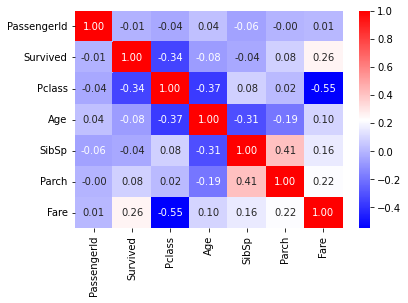

In [43]:
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap='bwr', fmt='.2f')

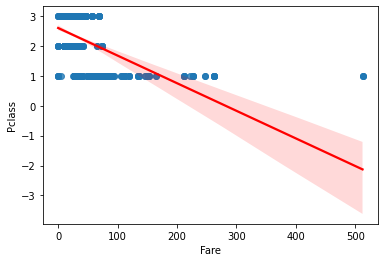

In [49]:
sns.regplot(data=df, x='Fare', y='Pclass', line_kws={'color':'red'})
plt.show()

In [ ]:
# ロジスティック回帰分析

In [82]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [97]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df_d = pd.get_dummies(df['Sex'])
df = pd.concat([df, df_d], axis=1)
df = df.drop('Sex', axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,NaN,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


In [100]:
df = df.dropna()

In [101]:
t = df['Survived']
X = df.drop('Survived', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [102]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression()
logi_model.fit(X_train, t_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
print(f' train score : {logi_model.score(X_train, t_train)}')
print(f' test score : {logi_model.score(X_test, t_test)}')

 train score : 0.7935871743486974
 test score : 0.827906976744186
